<a href="https://colab.research.google.com/github/kalpanareddigelli/my_project/blob/main/GISTEMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Analyzes and Plot the GISTEMP  Climate Data to identify and visualize temperature anomalies and their overall trend over Years Using Python


In [ ]:
filePath = '/content/drive/MyDrive/GISTEMP Analysis/GLB.Ts+dSST.csv'


import pandas as pd   #for data handling
import matplotlib.pyplot as plt  #for plotting
import seaborn as sns  # visualization enhancements
from scipy.stats import linregress #linear regression analysis
import numpy as np  #numerical operations

In [ ]:
#read the dataset

data = pd.read_csv(filePath, skiprows=1,  na_values='***')

In [ ]:
# Visualize first five rows from the dataframe
data.head(5)

#TO get the details of the data
data.info()

In [ ]:
#Dataframe with selected two columns - year, J-D = annual temperature anomaly values

data = data[["Year", "J-D"]] #J-D: jan to Dec

data = data.replace("***", np.nan)  #replace *** with NaN

In [ ]:
#convert to the numeric datatypes for plotting analysis

data["Year"] = pd.to_numeric(data["Year"])
data["J-D"] = pd.to_numeric(data["J-D"])

data = data.dropna() #REMOVE MISSING VALUES

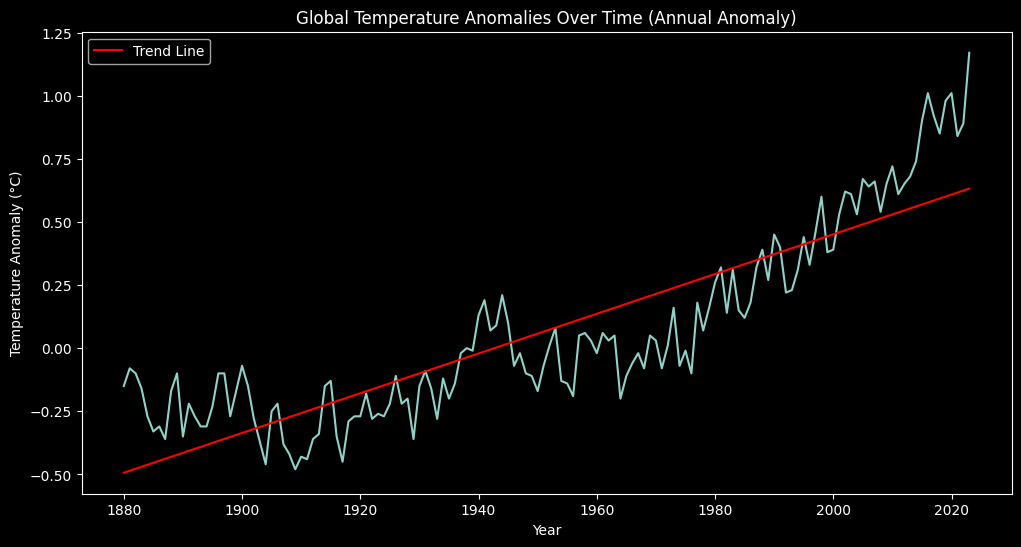

In [ ]:
#PLOTTING THE DATA

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='J-D', data=data)
plt.title('Global Temperature Anomalies Over Time (Annual Anomaly)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# LINEAR REGRESSION

slope, intercept, _, _, _ = linregress(range(len(data)), data['J-D'])
trend_line = intercept + slope * range(len(data))

# TREND LINE

plt.plot(data['Year'], trend_line, label='Trend Line', color='red')
plt.legend()
plt.show()




**Plot the Cimate stripes using NASA GISTEMP and Python**

In [ ]:
#read the dataset

data = pd.read_csv('/content/drive/MyDrive/GISTEMP Analysis/GLB.Ts+dSST.csv', skiprows = 1, na_values = '***')
data

In [ ]:
#dataframe with selected two columns

data = data[["Year", "J-D"]]

In [ ]:
#coverting columns data to numeric values to enhance plotting analysis

data["year"] = pd.to_numeric(data["Year"])
data["J-D"] = pd.to_numeric(data["J-D"])

#remove missing values(NaN)

data = data.dropna()


In [ ]:
import matplotlib.colors as mcolors

# colormap using the plt.get_cmap() function from the Matplotlib library. The chosen colormap is 'coolwarm', which represents a range of colors from cool tones (like blue) to warm tones (like red).

cmap = plt.get_cmap('coolwarm')



In [ ]:
#determine min and max values

anomaly_min = data['J-D'].min()
anomaly_max = data['J-D'].max()

#range shoulb between the [0,1]

normalize = mcolors.Normalize(vmin=anomaly_min, vmax=anomaly_max)

In [ ]:
#create a list of colors based on the range of anomaly values.

colors = [cmap(normalize(val)) for val in data['J-D']]

<ipython-input-197-8795b986ea63>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=cmap), label='Temperature Anomaly (°C)')


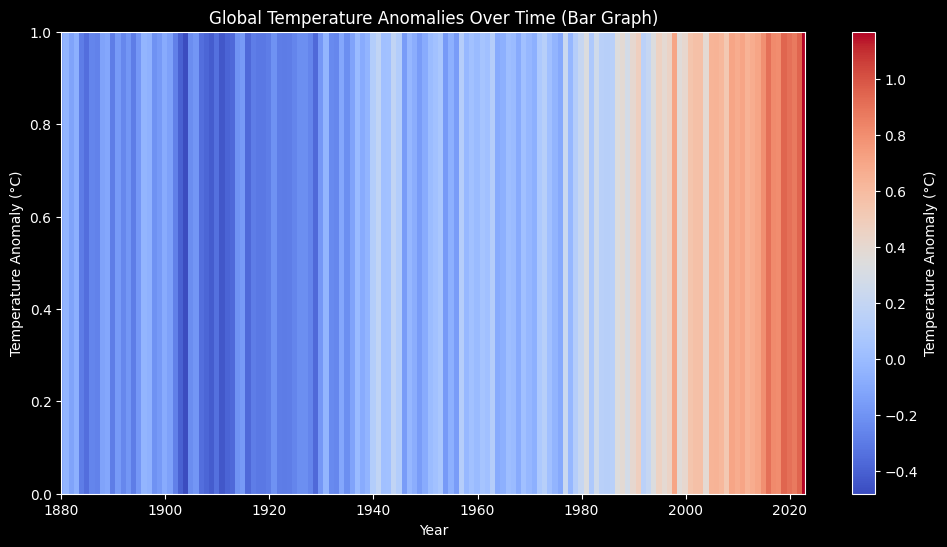

In [ ]:
#plotting the bar graph with color stripes



bar_width = 1.2  # Adjust this value based on your preference


plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], [1] * len(data), color=colors, width = bar_width)
plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=cmap), label='Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies Over Time (Bar Graph)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

plt.ylim(0, 1)
plt.xlim(1880,2023)

plt.show()

Global Temperature Anomalies over the years for the seasons.

In [ ]:
#file path

filepath = '/content/drive/MyDrive/GISTEMP Analysis/GLB.Ts+dSST.csv'

#read the dataset

data_set = pd.read_csv(filepath, skiprows = 1, na_values = '***')

In [ ]:
#create dataframe with selected columns

data_set = data_set[["Year", "DJF", "MAM", "JJA", "SON"]]

In [ ]:
#convert columns to numeric data type to ensure that the data is suitable for the plotting and analysis.

data_set["Year"] = pd.to_numeric(data_set["Year"])
data_set["DJF"] = pd.to_numeric(data_set["DJF"])
data_set["MAM"] = pd.to_numeric(data_set["MAM"])
data_set["JJA"] = pd.to_numeric(data_set["JJA"])
data_set["SON"] = pd.to_numeric(data_set["SON"])

#remove missing values (NaN)

data_set = data_set.dropna()


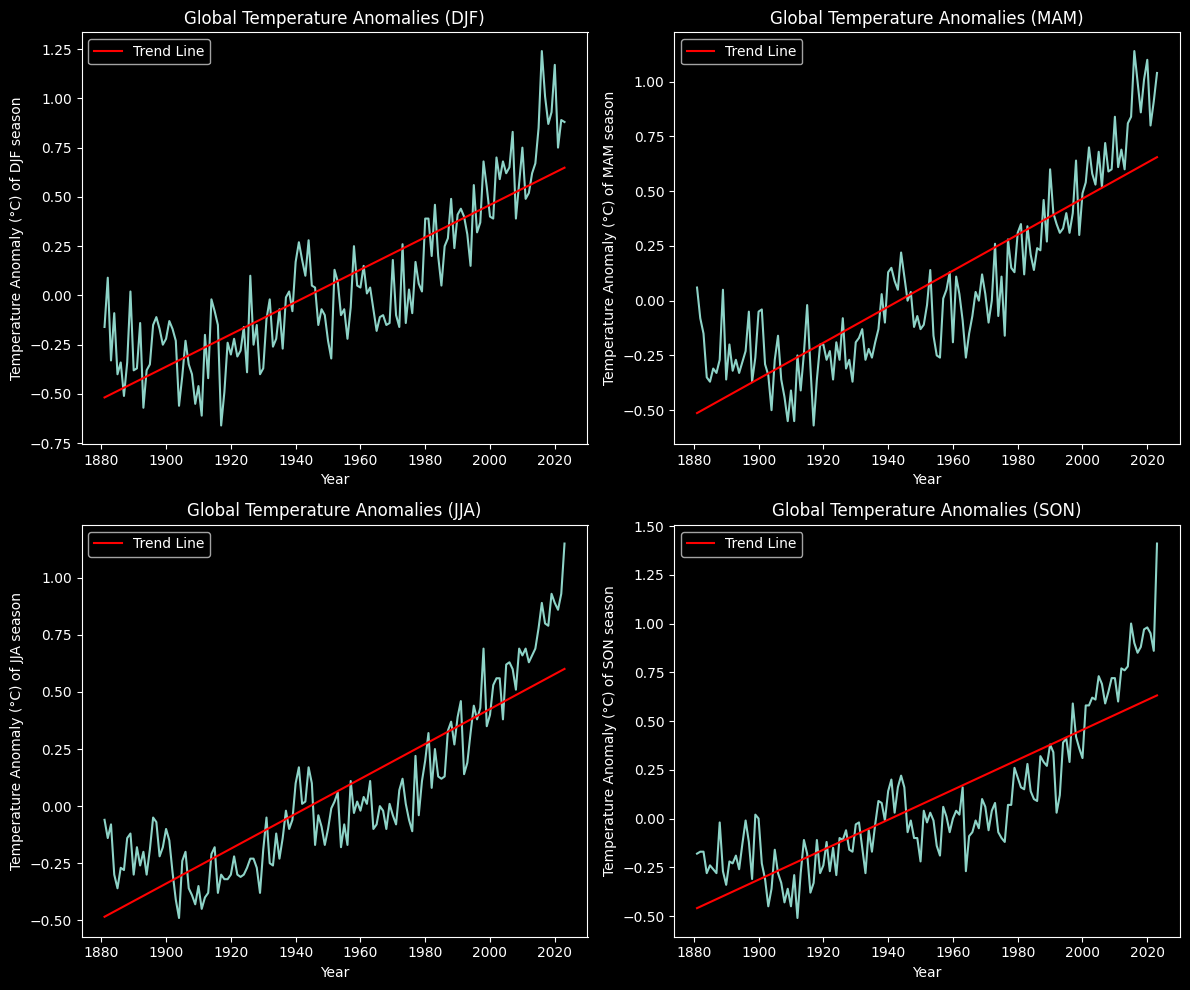

In [ ]:

# Set the dark background style
plt.style.use('dark_background')

# Create a figure with subplots in 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Iterate through each season and plot
for i, season in enumerate(seasons):
    # Extract data for the current season
    x_data = data_set['Year']
    y_data = data_set[season]

    # Create a line plot
    sns.lineplot(x=x_data, y=y_data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Global Temperature Anomalies ({season})')
    axes[i//2, i%2].set_xlabel('Year')
    axes[i//2, i%2].set_ylabel(f'Temperature Anomaly (°C) of {season} season')

    # Add trend line
    slope, intercept, _, _, _ = linregress(range(len(data_set)), y_data)
    trend_line = intercept + slope * range(len(data_set))
    axes[i//2, i%2].plot(x_data, trend_line, label='Trend Line', color='red')
    axes[i//2, i%2].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


Global Temperature Anomalies for the Summer Season Over Years.

In [ ]:
#read the data
data = pd.read_csv(filepath, skiprows = 1, na_values = '***')

In [ ]:
# dataframe with selected columns
data_summer = data[["Year", "JJA"]]

In [ ]:
#convert the columns to numeric datatypes to ensuring the data is suitable for plotting and analysis

data_summer["Year"] = pd.to_numeric(data_summer['Year'])
data_summer["JJA"] = pd.to_numeric(data_summer['JJA'])

In [ ]:
# drop missing values
data_summer = data_summer.dropna()

In [ ]:
# A colormap using the plt.get_cmap() function from the Matplotlib library. The chosen colormap is 'coolwarm', which represents a range of colors from cool tones (like blue) to warm tones (like red).
cmap = plt.get_cmap('coolwarm')


In [ ]:
#calcualte min and max values

anomaly_min_summer = data_summer['JJA'].min()
anomaly_max_summer = data_summer['JJA'].max()

# To make sure that the anomaly values are scaled proprotionally to fit within the [0,1]

normalize = mcolors.Normalize(vmin=anomaly_min_summer, vmax=anomaly_max_summer)

colors = [cmap(normalize(val)) for val in data_summer['JJA']]

<ipython-input-176-496bdcab50f6>:6: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=cmap), label='Temperature Anomaly (°C)')


Text(0, 0.5, 'Temperature Anomaly (°C) of Summer season')

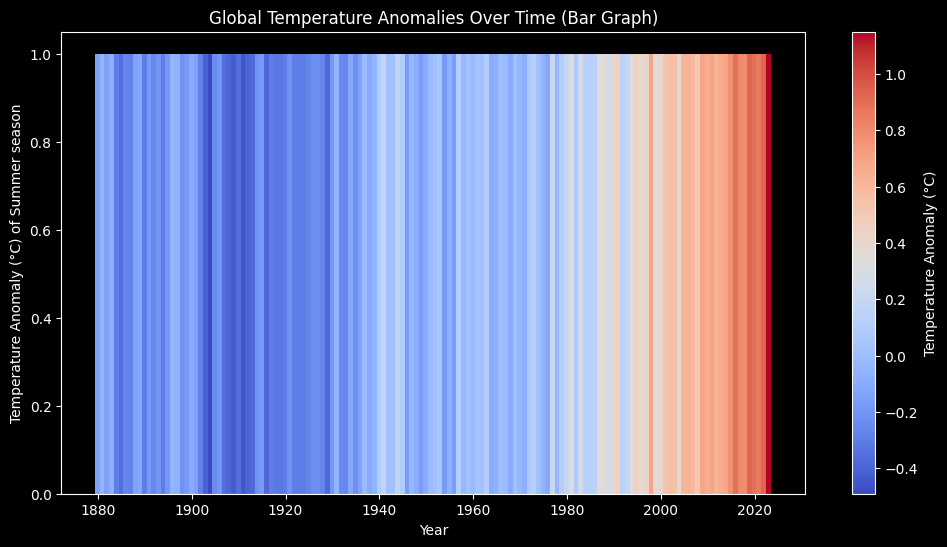

In [ ]:
# Create Bar graph

bar_width = 1.2
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.bar(data_summer['Year'], [1] * len(data_summer), color=colors, width=bar_width)
plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=cmap), label='Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies for the Summer Over Years (Bar Graph)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C) of Summer season')

In [ ]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Install Git
!apt-get install -y git

# Initialize a Git repository (if not already initialized)
!git init

# Add files to the staging area
!git add .

# Commit the changes
!git commit -m "Initial commit"

# Add your GitHub repository as a remote
!git remote add origin https://github.com/Kalpanagelli/GIS_work.git

# Push the changes to GitHub
!git push -u origin master


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
error: open("drive/MyDrive/Copy of Case Study 1 Exercise R Script.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/Copy of Case Study 1 Exercise R Script.gdoc'
fatal: adding files failed
Author identity unknown

*** Ple